In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
# Load the Excel sheets into pandas DataFrames
actuals_df = pd.read_excel('actuals.xlsx')
target_df = pd.read_excel('target.xlsx')
price_df = pd.read_excel('price.xlsx')
bcr_df = pd.read_excel('bcr.xlsx')

In [31]:
# Data Cleaning
# Remove unnecessary columns
actuals_df = actuals_df[['Material Description', 'Plant', 'Period', 'Year', 'Amount in LC', 'Quantity']]
target_df = target_df[['Year', 'Period', 'Plant', 'Material Number', 'Target Value in LC', 'Target Quantity']]
price_df = price_df[['Plant', 'Material Description', ' Price per case ']]
bcr_df = bcr_df[['Unnamed: 0', 'Bottle', 'Crate']]


In [32]:
# Remove duplicate rows from each DataFrame
actuals_df = actuals_df.drop_duplicates()
target_df = target_df.drop_duplicates()
price_df = price_df.drop_duplicates()
bcr_df = bcr_df.drop_duplicates()

# Reset the index for each DataFrame
actuals_df = actuals_df.reset_index(drop=True)
target_df = target_df.reset_index(drop=True)
price_df = price_df.reset_index(drop=True)
bcr_df = bcr_df.reset_index(drop=True)

In [33]:
# Remove rows without Material Number
target_df = target_df.dropna(subset=['Material Number'])
# Define the list of valid letters
valid_letters = ['Bottle', 'Crate', 'Keg', 'B&CR']
target_df = target_df[~target_df['Material Number'].str.contains('empty', case=False, na=False)]
target_df = target_df[target_df['Material Number'].str.contains('|'.join(valid_letters), case=False, na=False)]
# Group the DataFrame by the first four columns and calculate the sum of 'Target Value in LC' and 'Target Quantity'
target_grouped = target_df.groupby(['Year', 'Period', 'Plant', 'Material Number']).agg({
    'Target Value in LC': 'sum',
    'Target Quantity': 'sum'
}).reset_index()
# Sort the grouped DataFrame by the sum of 'Target Value in LC' and 'Target Quantity' in descending order
target_sorted = target_grouped.sort_values(by=['Target Value in LC', 'Target Quantity'], ascending=False)
# Drop duplicates, keeping the first occurrence (maximum sum) for each unique combination of the first four columns
target_df = target_sorted.drop_duplicates(subset=['Year', 'Period', 'Plant', 'Material Number'], keep='first')
# Reset the index after removing rows
target_df = target_df.reset_index(drop=True)
target_df = target_df.reset_index(drop=True)

# Remove rows without a price
price_df = price_df.dropna(subset=[' Price per case '])
price_df = price_df[~price_df['Material Description'].str.contains('Empty', na=False)]
price_df = price_df[~price_df['Material Description'].str.contains(r'^\s*(Bottle|KEG:\s*\d+L)\s*$', regex=True, na=False)]
price_df = price_df[~price_df['Material Description'].str.match(r'(?i)^(?:bottles|keg: \d+l)$', na=False)]
# Remove letters before Bottle, Crate, Keg, and B&CR in the second column
price_df['Material Description'] = price_df['Material Description'].str.replace(r'(?i)^(.*?)(Bottle|Crate|Keg|B&CR)', r'\2')
# Filter the DataFrame to keep rows where the second column contains Bottle, Crate, Keg, or B&CR (case-insensitive)
price_df = price_df[price_df['Material Description'].str.contains(r'(?i)(Bottle|Crate|Keg|B&CR)', na=False)]
# Sort the DataFrame by 'Price per case' column in descending order
price_df = price_df.sort_values(by=' Price per case ', ascending=False)
# Drop duplicates, keeping the first occurrence (highest price) for each unique combination of 'Plant' and 'Material Description'
price_df = price_df.drop_duplicates(subset=['Plant', 'Material Description'], keep='first')
price_df = price_df.reset_index(drop=True)


# Remove rows without "B&CR" in the first column
bcr_df = bcr_df[bcr_df.iloc[:, 0].str.contains('B&CR', na=False)]
# Remove rows where "Bottle" column doesn't contain the word "Bottle"
bcr_df = bcr_df[bcr_df['Bottle'].str.contains('Bottle', na=False)]
# Remove rows where "Crate" column doesn't contain the word "Crate"
bcr_df = bcr_df[bcr_df['Crate'].str.contains('Crate', na=False)]
bcr_df = bcr_df.reset_index(drop=True)

actuals_df = actuals_df[~actuals_df['Material Description'].str.contains('empty', case=False, na=False)]
actuals_df = actuals_df[actuals_df['Material Description'].str.contains('|'.join(valid_letters), case=False, na=False)]
# Group the DataFrame by the first four columns and sum the "Amount in LC" and "Quantity" values
actuals_df = actuals_df.groupby(['Material Description', 'Plant', 'Period', 'Year']).agg({
    'Amount in LC': 'sum',
    'Quantity': 'sum'
}).reset_index()
actuals_df = actuals_df.reset_index(drop=True)

# Save the cleaned DataFrames back to Excel files
actuals_df.to_excel('actuals_cleaned.xlsx', index=False)
price_df.to_excel('price_cleaned.xlsx', index=False)
bcr_df.to_excel('bcr_cleaned.xlsx', index=False)
target_df.to_excel('target_cleaned.xlsx', index=False)

/var/folders/6q/3ybqj4wn07df7_lkp6phjcq40000gn/T/ipykernel_33227/1104396895.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  price_df = price_df[~price_df['Material Description'].str.contains(r'^\s*(Bottle|KEG:\s*\d+L)\s*$', regex=True, na=False)]
/var/folders/6q/3ybqj4wn07df7_lkp6phjcq40000gn/T/ipykernel_33227/1104396895.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  price_df['Material Description'] = price_df['Material Description'].str.replace(r'(?i)^(.*?)(Bottle|Crate|Keg|B&CR)', r'\2')
/var/folders/6q/3ybqj4wn07df7_lkp6phjcq40000gn/T/ipykernel_33227/1104396895.py:28: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  price_df = price_df[price_df['Material Description'].str.contains(r'(?i)(Bottle|Crate|Keg|B&CR)', na=False)]


In [34]:

# Load the cleaned Actuals, Price, and B&CR data into pandas DataFrames
actuals_df = pd.read_excel('actuals_cleaned.xlsx')
price_df = pd.read_excel('price_cleaned.xlsx')
bcr_df = pd.read_excel('bcr_cleaned.xlsx')
target_df = pd.read_excel('target_cleaned.xlsx')


In [35]:
# Merge the Actuals and Price DataFrames based on Material Dec and Plant columns
consolidated_df = actuals_df.merge(price_df, on=['Material Description', 'Plant'], how='left')
print(consolidated_df.columns)

Index(['Material Description', 'Plant', 'Period', 'Year', 'Amount in LC',
       'Quantity', ' Price per case '],
      dtype='object')


In [36]:
# Calculate Bottle Rands: Bottle Price * Quantity
consolidated_df['Bottle Rands'] = consolidated_df[' Price per case '] * consolidated_df['Quantity']

# Calculate Crate Rands: Crate Price * Quantity
consolidated_df['Crate Rands'] = consolidated_df[' Price per case '] * consolidated_df['Quantity']

# Select the desired columns for the consolidated view
consolidated_view = consolidated_df[['Material Description', 'Plant', 'Bottle Rands', 'Crate Rands', 'Amount in LC', 'Quantity', 'Period', 'Year']]

# Save the consolidated view to a new Excel file named consolidated_view.xlsx
consolidated_view.to_excel('consolidated_view.xlsx', index=False)

In [37]:
# Actuals & Target analysis by Plant
actuals_by_plant = actuals_df.groupby('Plant')['Amount in LC', 'Quantity'].sum()
target_by_plant = target_df.groupby('Plant')['Target Value in LC', 'Target Quantity'].sum()

# Actuals, Target & their variance analysis by Plant & Category
actuals_target_by_plant_category = actuals_df.merge(target_df, left_on=['Plant', 'Material Description'], right_on=['Plant', 'Material Number'], how='inner')
variance_by_plant_category = actuals_target_by_plant_category.groupby(['Plant', 'Material Description'])['Amount in LC', 'Quantity', 'Target Value in LC', 'Target Quantity'].sum()


# Print the results
print("Actuals by Plant:")
print(actuals_by_plant)
print("\nTarget by Plant:")
print(target_by_plant)
print("\nActuals, Target & Variance by Plant & Category:")
print(variance_by_plant_category)

Actuals by Plant:
       Amount in LC      Quantity
Plant                            
AA     5.666538e+07  1.940606e+06
AB     3.368728e+07  2.301587e+06
AC     3.621493e+07  1.227612e+06
AD     2.071014e+07  6.898945e+05
AE     1.655495e+07  5.673815e+05
AF     2.516121e+07  9.042648e+05
AG     2.227565e+07  1.348226e+06

Target by Plant:
       Target Value in LC  Target Quantity
Plant                                     
AA           1.278602e+07    880625.069091
AB           4.471671e+06    308963.515758
AC           4.419717e+06    299417.401515
AD           5.772583e+06    384565.041515
AE           5.764346e+06    393637.774242
AF           2.940857e+06    201036.832424
AG           6.316584e+06    390764.924545

Actuals, Target & Variance by Plant & Category:
                                    Amount in LC       Quantity  \
Plant Material Description                                        
AA    Crate: 1L Brown              -5.371980e+04   -3643.030303   
      Crate: Brown Qu

/var/folders/6q/3ybqj4wn07df7_lkp6phjcq40000gn/T/ipykernel_33227/760463118.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  actuals_by_plant = actuals_df.groupby('Plant')['Amount in LC', 'Quantity'].sum()
/var/folders/6q/3ybqj4wn07df7_lkp6phjcq40000gn/T/ipykernel_33227/760463118.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  target_by_plant = target_df.groupby('Plant')['Target Value in LC', 'Target Quantity'].sum()
/var/folders/6q/3ybqj4wn07df7_lkp6phjcq40000gn/T/ipykernel_33227/760463118.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  variance_by_plant_category = actuals_target_by_plant_category.groupby(['Plant', 'Material Description'])['Amount in LC', 'Quantity', 'Target Value in LC', 'Target Quantity'].sum()


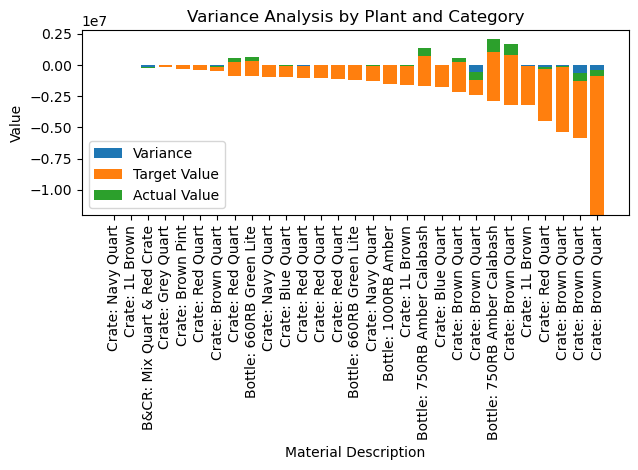

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the total variance for each combination of Plant and Material Description
variance_by_plant_category['Variance'] = variance_by_plant_category['Amount in LC'] - variance_by_plant_category['Target Value in LC']

# Sort the data by the total variance in descending order
variance_by_plant_category = variance_by_plant_category.sort_values('Variance', ascending=False)

# Create a waterfall chart
fig, ax = plt.subplots()
bar_labels = variance_by_plant_category.index.get_level_values('Material Description')
x_pos = np.arange(len(bar_labels))

# Plot the bars for variance
ax.bar(x_pos, variance_by_plant_category['Variance'], color='C0')

# Plot the bars for target value
ax.bar(x_pos, variance_by_plant_category['Target Value in LC'], bottom=variance_by_plant_category['Variance'], color='C1')

# Plot the bars for actual value
ax.bar(x_pos, variance_by_plant_category['Amount in LC'], bottom=variance_by_plant_category['Variance'] + variance_by_plant_category['Target Value in LC'], color='C2')

# Set chart title and labels
plt.title('Variance Analysis by Plant and Category')
plt.xlabel('Material Description')
plt.ylabel('Value')

# Add legend
ax.legend(['Variance', 'Target Value', 'Actual Value'])

# Rotate x-axis labels if needed
plt.xticks(x_pos, bar_labels, rotation=90)

# Display the chart
plt.tight_layout()
plt.show()


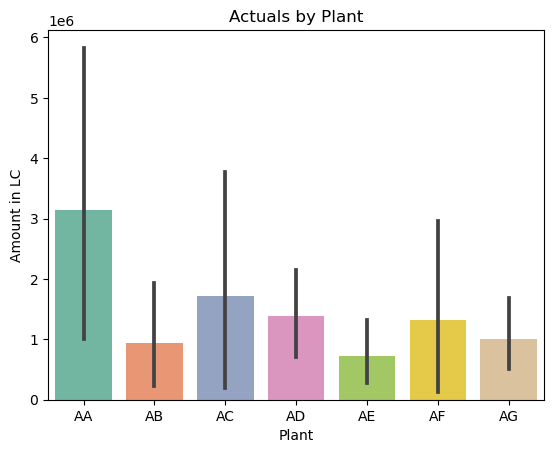

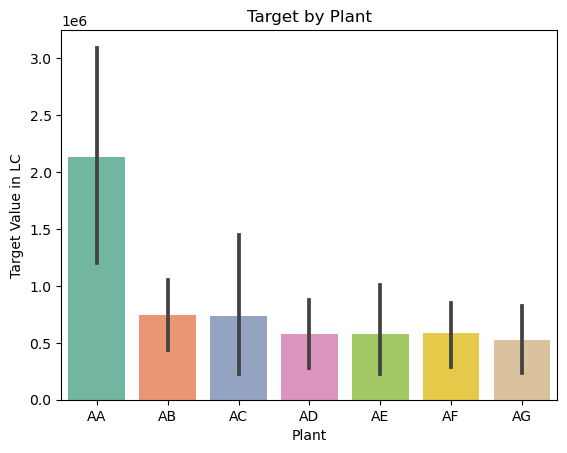

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the dataframes by plant name
actuals_df_sorted = actuals_df.sort_values('Plant')
target_df_sorted = target_df.sort_values('Plant')
variance_by_plant_category_sorted = variance_by_plant_category.sort_values('Plant')

# Create a color mapping dictionary for consistent colors
plant_colors = {}
unique_plants = actuals_df_sorted['Plant'].unique()
color_palette = sns.color_palette("Set2", len(unique_plants))
for i, plant in enumerate(unique_plants):
    plant_colors[plant] = color_palette[i]

# Bar Chart - Actuals by Plant
sns.barplot(x='Plant', y='Amount in LC', data=actuals_df_sorted, palette=plant_colors.values())
plt.title('Actuals by Plant')
plt.xlabel('Plant')
plt.ylabel('Amount in LC')
plt.show()

# Bar Chart - Target by Plant
sns.barplot(x='Plant', y='Target Value in LC', data=target_df_sorted, palette=plant_colors.values())
plt.title('Target by Plant')
plt.xlabel('Plant')
plt.ylabel('Target Value in LC')
plt.show()




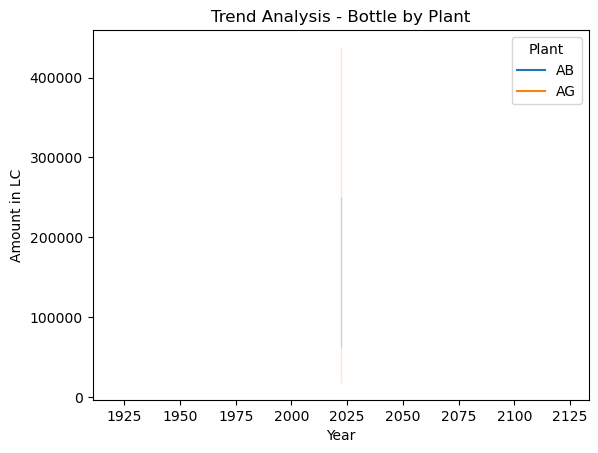

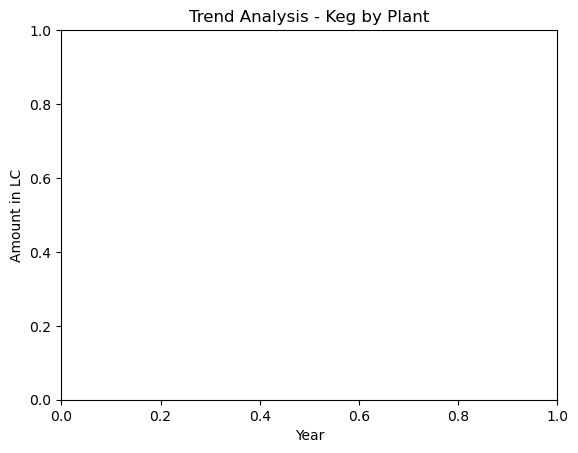

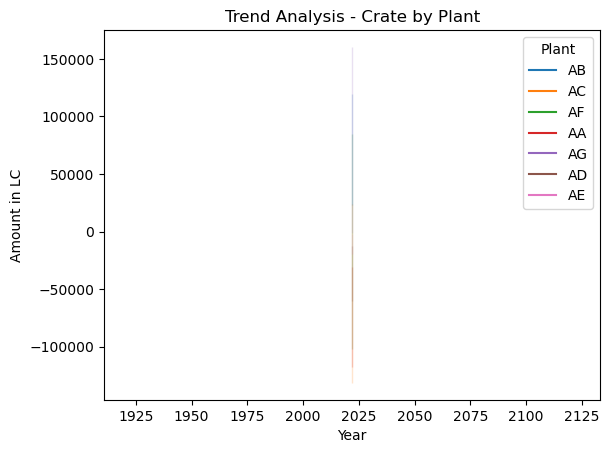

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Material Description column to lowercase for case insensitivity
actuals_df['Material Description'] = actuals_df['Material Description'].str.lower()

# Filter the data by material description (Bottle, Keg, Crate)
bottle_data = actuals_df[actuals_df['Material Description'].str.contains('bottle:', case=False)].copy()
keg_data = actuals_df[actuals_df['Material Description'].str.contains('keg:', case=False)].copy()
crate_data = actuals_df[actuals_df['Material Description'].str.contains('crate:', case=False)].copy()

# Add a constant year column
bottle_data.loc[:, 'Year'] = 2022
keg_data.loc[:, 'Year'] = 2022
crate_data.loc[:, 'Year'] = 2022

# Line Plot - Bottle by Plant
sns.lineplot(x='Year', y='Amount in LC', hue='Plant', data=bottle_data)
plt.title('Trend Analysis - Bottle by Plant')
plt.xlabel('Year')
plt.ylabel('Amount in LC')
plt.show()

# Line Plot - Keg by Plant
sns.lineplot(x='Year', y='Amount in LC', hue='Plant', data=keg_data)
plt.title('Trend Analysis - Keg by Plant')
plt.xlabel('Year')
plt.ylabel('Amount in LC')
plt.show()

# Line Plot - Crate by Plant
sns.lineplot(x='Year', y='Amount in LC', hue='Plant', data=crate_data)
plt.title('Trend Analysis - Crate by Plant')
plt.xlabel('Year')
plt.ylabel('Amount in LC')
plt.show()
